In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


After mounting your Google Drive, you can load your dataset. Replace `'path/to/your/dataset.csv'` with the actual path to your file in Google Drive.

In [3]:
import pandas as pd

# Replace 'path/to/your/dataset.csv' with the actual path to your file in Google Drive
try:
    df = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/ML/mental_health_data.csv')
    display(df.head())
except FileNotFoundError:
    print("Error: Dataset not found. Please check the path to your file.")
except Exception as e:
    print(f"An error occurred: {e}")

,User_ID,Age,Gender,Occupation,Country,Mental_Health_Condition,Severity,Consultation_History,Stress_Level,Sleep_Hours,Work_Hours,Physical_Activity_Hours,Social_Media_Usage,Diet_Quality,Smoking_Habit,Alcohol_Consumption,Medication_Usage
0,1,36,Male,Education,Australia,Yes,NaN,Yes,Low,7.6,46,8,2.2,Healthy,Regular Smoker,Regular Drinker,Yes
1,2,48,Male,Engineering,Other,No,Low,No,Low,6.8,74,2,3.4,Unhealthy,Heavy Smoker,Social Drinker,No
2,3,18,Prefer not to say,Sales,India,No,NaN,Yes,Medium,7.1,77,9,5.9,Healthy,Heavy Smoker,Social Drinker,No
3,4,30,Non-binary,Engineering,Australia,No,Medium,No,Low,6.9,57,4,5.4,Average,Regular Smoker,Regular Drinker,No
4,5,58,Male,IT,USA,Yes,NaN,Yes,High,4.7,45,10,3.3,Unhealthy,Regular Smoker,Non-Drinker,Yes


In [4]:
# ----------------------------
# Step 1: Drop duplicates
# ----------------------------
df = df.drop_duplicates()
#df

In [5]:
# ----------------------------
# Step 2: Drop useless column
# ----------------------------
df = df.drop(columns=["Unnamed: 0"], errors="ignore")
#df

In [6]:
# ----------------------------
# Step 3: Handle missing values
# ----------------------------
# Option A: Fill missing values in 'Severity' with "Unknown"
df["Severity"] = df["Severity"].fillna("Unknown")
#df

In [7]:
# ----------------------------
# Step 4: Encode categorical variables
# ----------------------------
# Identify categorical columns
categorical_cols = [
    "Gender", "Occupation", "Country",
    "Mental_Health_Condition", "Severity",
    "Consultation_History", "Stress_Level",
    "Diet_Quality", "Smoking_Habit",
    "Alcohol_Consumption", "Medication_Usage"
]

# One-hot encode them
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
# ----------------------------
# Save cleaned dataset in Google Drive path
# ----------------------------
save_path = "/content/drive/MyDrive/ColabNotebooks/ML/ML_dataset_cleaned.csv"
df_encoded.to_csv(save_path, index=False)
print("✅ Dataset cleaned and saved as ML_dataset_cleaned.csv")

✅ Dataset cleaned and saved as ML_dataset_cleaned.csv


In [8]:
df_encoded.head()

,User_ID,Age,Sleep_Hours,Work_Hours,Physical_Activity_Hours,Social_Media_Usage,Gender_Male,Gender_Non-binary,Gender_Prefer not to say,Occupation_Engineering,...,Stress_Level_Medium,Diet_Quality_Healthy,Diet_Quality_Unhealthy,Smoking_Habit_Non-Smoker,Smoking_Habit_Occasional Smoker,Smoking_Habit_Regular Smoker,Alcohol_Consumption_Non-Drinker,Alcohol_Consumption_Regular Drinker,Alcohol_Consumption_Social Drinker,Medication_Usage_Yes
0,1,36,7.6,46,8,2.2,True,False,False,False,...,False,True,False,False,False,True,False,True,False,True
1,2,48,6.8,74,2,3.4,True,False,False,True,...,False,False,True,False,False,False,False,False,True,False
2,3,18,7.1,77,9,5.9,False,False,True,False,...,True,True,False,False,False,False,False,False,True,False
3,4,30,6.9,57,4,5.4,False,True,False,True,...,False,False,False,False,False,True,False,True,False,False
4,5,58,4.7,45,10,3.3,True,False,False,False,...,False,False,True,False,False,True,True,False,False,True


In [9]:

# 2. Convert data types
df_encoded['Age'] = df_encoded['Age'].astype(int)
df_encoded['Sleep_Hours'] = df_encoded['Sleep_Hours'].astype(float)
df_encoded['Work_Hours'] = df_encoded['Work_Hours'].astype(float)
df_encoded['Physical_Activity_Hours'] = df_encoded['Physical_Activity_Hours'].astype(float)
df_encoded['Social_Media_Usage'] = df_encoded['Social_Media_Usage'].astype(float)

# For boolean columns:
bool_cols = [col for col in df.columns if col.startswith('Gender_') or col.startswith('Country_') or col.startswith('Occupation_')
or col.startswith("Mental_Health_Condition_") or col.startswith("Severity_") or col.startswith('Consultation_History_')
or col.startswith('Stress_Level_') or col.startswith('Diet_Quality_') or col.startswith('Smoking_Habit_')
or col.startswith('Alcohol_Consumption_') or col.startswith('Medication_Usage_')]

df_encoded[bool_cols] = df_encoded[bool_cols].astype(bool)


# Display data types of all columns
print(df_encoded.dtypes)



User_ID                                  int64
Age                                      int64
Sleep_Hours                            float64
Work_Hours                             float64
Physical_Activity_Hours                float64
Social_Media_Usage                     float64
Gender_Male                               bool
Gender_Non-binary                         bool
Gender_Prefer not to say                  bool
Occupation_Engineering                    bool
Occupation_Finance                        bool
Occupation_Healthcare                     bool
Occupation_IT                             bool
Occupation_Other                          bool
Occupation_Sales                          bool
Country_Canada                            bool
Country_Germany                           bool
Country_India                             bool
Country_Other                             bool
Country_UK                                bool
Country_USA                               bool
Mental_Health

In [10]:
from sklearn.preprocessing import StandardScaler
# 3. Feature scaling
scaler = StandardScaler()
df_encoded[['Age', 'Sleep_Hours', 'Work_Hours', 'Physical_Activity_Hours', 'Social_Media_Usage']] = scaler.fit_transform(df_encoded[['Age', 'Sleep_Hours', 'Work_Hours', 'Physical_Activity_Hours', 'Social_Media_Usage']])

df_encoded.head()

,User_ID,Age,Sleep_Hours,Work_Hours,Physical_Activity_Hours,Social_Media_Usage,Gender_Male,Gender_Non-binary,Gender_Prefer not to say,Occupation_Engineering,...,Stress_Level_Medium,Diet_Quality_Healthy,Diet_Quality_Unhealthy,Smoking_Habit_Non-Smoker,Smoking_Habit_Occasional Smoker,Smoking_Habit_Regular Smoker,Alcohol_Consumption_Non-Drinker,Alcohol_Consumption_Regular Drinker,Alcohol_Consumption_Social Drinker,Medication_Usage_Yes
0,1,-0.395338,0.340556,-0.616881,0.954529,-0.658054,True,False,False,False,...,False,True,False,False,False,True,False,True,False,True
1,2,0.471460,-0.121163,1.288992,-0.943168,0.098939,True,False,False,True,...,False,False,True,False,False,False,False,False,True,False
2,3,-1.695536,0.051981,1.493193,1.270812,1.676008,False,False,True,False,...,True,True,False,False,False,False,False,False,True,False
3,4,-0.828737,-0.063448,0.131855,-0.310602,1.360594,False,True,False,True,...,False,False,False,False,False,True,False,True,False,False
4,5,1.193793,-1.333175,-0.684948,1.587095,0.035856,True,False,False,False,...,False,False,True,False,False,True,True,False,False,True


In [11]:
from sklearn.model_selection import train_test_split
# 4. Train-test split
X = df_encoded.drop(['User_ID', 'Mental_Health_Condition_Yes'], axis=1)  # Example: predicting mental health condition
y = df_encoded['Mental_Health_Condition_Yes']

# First, split off the test set (15%)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
print("X_temp",X_temp.shape)
print("X_test",X_test.shape)
print("y_temp",y_temp.shape)
print("y_test",y_test.shape)

# Then, split the remaining 85% into train (70%) and validation (15%)
val_size = 0.15 / 0.85  # proportion of validation in the remaining data
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=val_size, random_state=42)

print("X_train",X_train.shape)
print("X_test",X_test.shape)
print("X_val",X_val.shape)
print("y_val",y_val.shape)



X_temp (42500, 35)
X_test (7500, 35)
y_temp (42500,)
y_test (7500,)
X_train (34999, 35)
X_test (7500, 35)
X_val (7501, 35)
y_val (7501,)


In [12]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier  # Example model

kf = KFold(n_splits=50, shuffle=True, random_state=42)
model = RandomForestClassifier()

# Perform cross-validation on the training set
scores = cross_val_score(model, X_train, y_train, cv=kf)
print("Cross-validation scores:", scores)
print("Average CV score:", scores.mean())


Cross-validation scores: [0.50142857 0.50142857 0.52285714 0.50571429 0.51714286 0.48
 0.49714286 0.50714286 0.5        0.47142857 0.47857143 0.51285714
 0.49714286 0.48428571 0.50714286 0.51142857 0.52       0.48
 0.51       0.48285714 0.49       0.46       0.48       0.48857143
 0.53428571 0.49428571 0.51714286 0.49285714 0.51142857 0.50285714
 0.49       0.49428571 0.50285714 0.46285714 0.46142857 0.52857143
 0.48571429 0.44       0.48714286 0.49857143 0.50285714 0.50857143
 0.5        0.48714286 0.47571429 0.47714286 0.47571429 0.52
 0.51142857 0.51359084]
Average CV score: 0.49567181688125894


In [14]:
from xgboost import XGBClassifier  # Use XGBoost instead of RandomForest

kf = KFold(n_splits=50, shuffle=True, random_state=42)

model = XGBClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='logloss'
)


# Perform cross-validation on the training set
scores = cross_val_score(model, X_train, y_train, cv=kf)
print("Cross-validation scores:", scores)
print("Average CV score:", scores.mean())

Cross-validation scores: [0.51571429 0.49571429 0.53285714 0.51       0.50714286 0.52
 0.52285714 0.54857143 0.48857143 0.50571429 0.51857143 0.49285714
 0.52285714 0.5        0.50714286 0.49285714 0.52285714 0.50285714
 0.47857143 0.49571429 0.50428571 0.49142857 0.48142857 0.51
 0.49428571 0.50142857 0.53142857 0.50571429 0.49142857 0.51142857
 0.49285714 0.47571429 0.52       0.49428571 0.52714286 0.51428571
 0.49142857 0.49571429 0.51       0.47857143 0.47142857 0.51
 0.48       0.45285714 0.51285714 0.49285714 0.50571429 0.46857143
 0.51571429 0.46065808]
Average CV score: 0.5014988759452279


In [17]:
print(y_train.value_counts(normalize=True))

 #What does this mean?

#Your dataset is very well balanced — almost a perfect 50/50 split between the two classes.
#This is good news because:

#You don’t need to apply class balancing techniques like oversampling or undersampling.
#Your model’s poor performance (around 50% accuracy) is not due to class imbalance.

Mental_Health_Condition_Yes
False    0.500243
True     0.499757
Name: proportion, dtype: float64


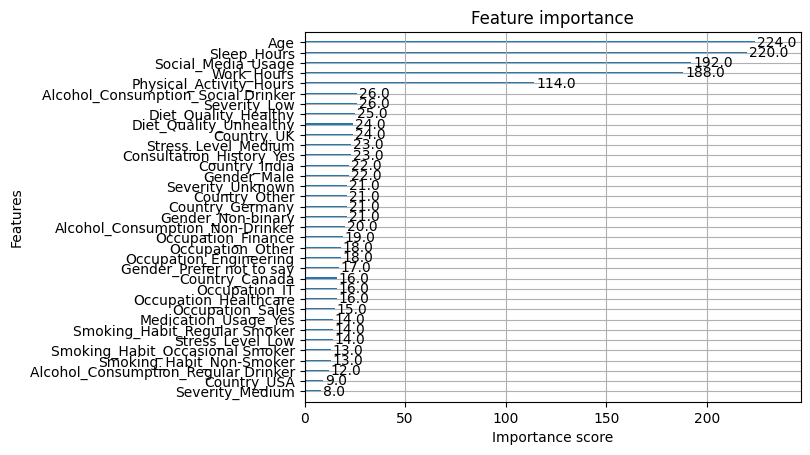

In [16]:
model.fit(X_train, y_train)
import matplotlib.pyplot as plt
from xgboost import plot_importance
plot_importance(model)
plt.show()


In [19]:
df_encoded['preds'] = model.predict(X)
df_encoded['actual'] = y
df_encoded.groupby('Gender_Male')[['preds', 'actual']].mean()


,preds,actual
Gender_Male,,
False,0.506036,0.500893
True,0.451936,0.497074


from matplotlib import pyplot as plt
_df_0['preds'].plot(kind='hist', bins=20, title='preds')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['actual'].plot(kind='hist', bins=20, title='actual')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='preds', y='actual', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['preds'].plot(kind='line', figsize=(8, 4), title='preds')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['actual'].plot(kind='line', figsize=(8, 4), title='actual')
plt.gca().spines[['top', 'right']].set_visible(False)

In [20]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from scipy.stats import randint, uniform

# Define the model
model = XGBClassifier(eval_metric='logloss', random_state=42)

# Define the hyperparameter search space
param_dist = {
    'n_estimators': randint(50, 300),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'reg_alpha': uniform(0, 1),
    'reg_lambda': uniform(0, 1)
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=20,
    scoring='accuracy',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit on training data
random_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best CV Score:", random_search.best_score_)

#📊 Best Cross-Validation Score
# 0.5041 (or 50.41% accuracy)

#This is slightly better than your previous score (~50.15%), but still close to random guessing.

#🧠 What This Tells Us

#Your model is now better tuned, but the features may still not be strong enough to make accurate predictions.
#The data might be noisy, or the target variable may not be strongly correlated with the features.


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'colsample_bytree': np.float64(0.6693458614031088), 'learning_rate': np.float64(0.12731818227197222), 'max_depth': 4, 'n_estimators': 153, 'reg_alpha': np.float64(0.7553614103176525), 'reg_lambda': np.float64(0.4251558744912447), 'subsample': np.float64(0.6831766651472755)}
Best CV Score: 0.5041283734411038


In [21]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Best parameters from RandomizedSearchCV
best_model = XGBClassifier(
    colsample_bytree=0.669,
    learning_rate=0.127,
    max_depth=4,
    n_estimators=153,
    reg_alpha=0.755,
    reg_lambda=0.425,
    subsample=0.683,
    eval_metric='logloss',
    random_state=42
)

# Train the model
best_model.fit(X_train, y_train)

# Evaluate on validation set
val_preds = best_model.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, val_preds))
print("Validation Report:\n", classification_report(y_val, val_preds))

# Evaluate on test set
test_preds = best_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, test_preds))
print("Test Report:\n", classification_report(y_test, test_preds))


Validation Accuracy: 0.5020663911478469
Validation Report:
               precision    recall  f1-score   support

       False       0.51      0.51      0.51      3778
        True       0.50      0.49      0.50      3723

    accuracy                           0.50      7501
   macro avg       0.50      0.50      0.50      7501
weighted avg       0.50      0.50      0.50      7501

Test Accuracy: 0.5008
Test Report:
               precision    recall  f1-score   support

       False       0.50      0.51      0.51      3717
        True       0.51      0.49      0.50      3783

    accuracy                           0.50      7500
   macro avg       0.50      0.50      0.50      7500
weighted avg       0.50      0.50      0.50      7500



In [27]:
def get_severity(row):
    if row['Severity_Low']:
        return 'Low'
    elif row['Severity_Medium']:
        return 'Medium'
    elif row['Severity_Unknown']:
        return 'Unknown'
    else:
        return 'Missing'

# Apply the function to df_encoded and create a new 'Severity' column in df
df_encoded['Severity'] = df_encoded.apply(get_severity, axis=1)

# Drop rows with no severity if needed (based on your logic)
df_encoded = df_encoded[df_encoded['Severity'] != 'Missing']

In [28]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_encoded['Severity_encoded'] = le.fit_transform(df_encoded['Severity'])  # e.g., Low=1, Medium=2, Unknown=0


/tmp/ipython-input-2948734210.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded['Severity_encoded'] = le.fit_transform(df_encoded['Severity'])  # e.g., Low=1, Medium=2, Unknown=0


In [29]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop(columns=['User_ID', 'Severity_Low', 'Severity_Medium', 'Severity_Unknown', 'Severity'])
y = df_encoded['Severity_encoded']

# 70-15-15 split
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=42)
val_size = 0.15 / 0.85
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=val_size, stratify=y_temp, random_state=42)


In [30]:
from xgboost import XGBClassifier

model = XGBClassifier(
    objective='multi:softprob',
    num_class=3,
    eval_metric='mlogloss',
    random_state=42
)
model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=3, ...)

In [31]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize

# Predict
y_val_pred = model.predict(X_val)
y_val_proba = model.predict_proba(X_val)

# Accuracy and report
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Classification Report:\n", classification_report(y_val, y_val_pred, target_names=le.classes_))

# Macro AUC
y_val_bin = label_binarize(y_val, classes=[0, 1, 2])
macro_auc = roc_auc_score(y_val_bin, y_val_proba, average='macro', multi_class='ovr')
print("Macro AUC:", macro_auc)


Validation Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

         Low       1.00      1.00      1.00      1239
      Medium       1.00      1.00      1.00      1265
     Unknown       1.00      1.00      1.00      3751

    accuracy                           1.00      6255
   macro avg       1.00      1.00      1.00      6255
weighted avg       1.00      1.00      1.00      6255

Macro AUC: 1.0
